In [1]:
import numpy as np

import os
import glob #tqdm
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Neural Network
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# OpenCV
import cv2

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
testimageDatasetspath = "Datasets/train/train"
datasetsNamesTest = os.listdir(testimageDatasetspath)

In [7]:
a = list(np.random.randint(0, 100, size = 20))
a

[74, 64, 32, 23, 94, 28, 58, 36, 22, 33, 8, 43, 0, 51, 15, 46, 49, 5, 11, 35]

In [8]:
np.unique(datasetsNamesTest)

array(['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', ..., 'dog.9997.jpg',
       'dog.9998.jpg', 'dog.9999.jpg'], dtype='<U13')

In [9]:
datasetsNamesTest.index("dog.9997.jpg")

24997

In [10]:
datasetsNamesTest[24997]

'dog.9997.jpg'

In [11]:
image_width = 28
image_height = 28

In [12]:
def imageFeatureExtract(image, size = (28, 28)):
    img = cv2.resize(image, size)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = np.expand_dims(gray, 2)#(28, 28, 1)
    return gray

In [13]:
#testimageDatasetspath = "Datasets/train/cat.100.jpg"

In [20]:
Datasetspath = "Datasets/train/train"
datasetPath = os.path.join(Datasetspath, "*g")
fileRead = glob.glob(datasetPath)

data = []
category_or_class = []

for (i, file) in enumerate(fileRead):
    image = cv2.imread(file)
    feature = imageFeatureExtract(image)
    data.append(feature)
    classNames = file.split(os.path.sep)[-1].split(".")[0]
    category_or_class.append(classNames)

In [22]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [25]:
# Datasets Scalling
data = np.array(data, dtype = np.uint8)
labels = np.array(category_or_class)

In [26]:
data.shape

(25000, 28, 28, 1)

In [27]:
np.unique(category_or_class)

array(['cat', 'dog'], dtype='<U3')

In [28]:
len(data)

25000

In [29]:
len(category_or_class)

25000

In [30]:
type(category_or_class)

list

#### Step 01: Label Encoder

In [31]:
labels  = np.array(category_or_class)
label_Encoder = LabelEncoder()
#label_Encoder = preprocessing.LabelEncoder
classNames = label_Encoder.fit_transform(labels)

In [32]:
np.unique(classNames)

array([0, 1], dtype=int64)

In [33]:
classNames.shape

(25000,)

In [34]:
classNames[0]

0

#### Step 02: OneHotEncoding

In [35]:
oneHotEncoder = OneHotEncoder(sparse = False)
label_EncoderValue = classNames.reshape(len(classNames), 1)
oneHotEncoderValues = oneHotEncoder.fit_transform(label_EncoderValue)

In [36]:
#help(OneHotEncoder() )

In [37]:
oneHotEncoderValues

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [38]:
# data = ["Cats", "Dogs", "Birds"]
# np.array([[1., 0., 0],
#        [0., 1., 0.],
#        [0., 0., 1.]])

In [39]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, oneHotEncoderValues, test_size=0.2, random_state=42)

In [40]:
model = Sequential() # Empty 

# 1st layer
model.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", input_shape = (28, 28, 1), padding = "same"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# 2nd Layer
model.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", padding = "valid"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# Flatten Layer
model.add(Flatten())

# Output Layer
model.add(Dense(120, activation = "tanh"))
model.add(Dense(84, activation = "tanh"))
model.add(Dense(2, activation = "softmax"))

In [41]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [43]:
# history = model.fit(X_train, Y_train,
# epochs=                  epochs=10,
#                    validation_data = (X_test, Y_test), 
#                     verbose = 0)

In [44]:
model.fit(X_train, Y_train,
          epochs = 10,
          validation_data = (X_test, Y_test), 
          verbose = 1)

Epoch 1/10
625/625 [==============================] - 12s 18ms/step - loss: 0.6673 - accuracy: 0.5975 - val_loss: 0.6525 - val_accuracy: 0.6122
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 0.6302 - accuracy: 0.6447 - val_loss: 0.6386 - val_accuracy: 0.6362
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.6076 - accuracy: 0.6689 - val_loss: 0.6387 - val_accuracy: 0.6346
Epoch 4/10
625/625 [==============================] - 11s 17ms/step - loss: 0.6069 - accuracy: 0.6702 - val_loss: 0.6040 - val_accuracy: 0.6716
Epoch 5/10
625/625 [==============================] - 11s 17ms/step - loss: 0.5844 - accuracy: 0.6884 - val_loss: 0.6287 - val_accuracy: 0.6484
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.5678 - accuracy: 0.7066 - val_loss: 0.5981 - val_accuracy: 0.6774
Epoch 7/10
625/625 [==============================] - 11s 17ms/step - loss: 0.5505 - accuracy: 0.7194 - val_loss: 0.6000 - val_accuracy:

In [45]:
class LeNet_Model(Sequential):
    
    def __init__(self, input_shape, number_class):
        super().__init__()
        
        # 1st layer
        self.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", input_shape = input_shape, padding = "same"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

        # 2nd Layer
        self.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", padding = "valid"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

        # Flatten Layer
        self.add(Flatten())

        # Output Layer
        self.add(Dense(120, activation = "tanh"))
        self.add(Dense(84, activation = "tanh"))
        self.add(Dense(number_class, activation = "softmax"))
        
        self.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
        

In [46]:
input_shapes = X_train[0].shape
number_class = len(np.unique(labels))

In [47]:
myModel = LeNet_Model(input_shapes, number_class)

In [48]:
myModel.summary()

Model: "le_net__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)             

In [49]:
import datetime
logsData = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = tf.keras.callbacks.TensorBoard(log_dir = logsData, histogram_freq = 1)

In [50]:
history = model.fit(X_train, Y_train,
          epochs = 10,
          validation_data = (X_test, Y_test),
          callbacks=[callbacks],
          verbose = 1)

Epoch 1/10
625/625 [==============================] - 11s 18ms/step - loss: 0.4739 - accuracy: 0.7735 - val_loss: 0.6272 - val_accuracy: 0.6826
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.4557 - accuracy: 0.7858 - val_loss: 0.6180 - val_accuracy: 0.6868
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4322 - accuracy: 0.7978 - val_loss: 0.6221 - val_accuracy: 0.6890
Epoch 4/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4024 - accuracy: 0.8177 - val_loss: 0.6391 - val_accuracy: 0.6864
Epoch 5/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3793 - accuracy: 0.8291 - val_loss: 0.6684 - val_accuracy: 0.6846
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3534 - accuracy: 0.8438 - val_loss: 0.6830 - val_accuracy: 0.6834
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3257 - accuracy: 0.8618 - val_loss: 0.7177 - val_accuracy:

In [52]:
#%load_ext tensorboard

In [53]:
#%tensorboard --logdir logs/fit

In [54]:
model.save("Models/CatsAndDogs.h5")

In [55]:
class_data = ["cat", 'dog']
saveModelData = load_model("Models/CatsAndDogs.h5")

In [58]:
testImageData = cv2.imread("Datasets/test/test/10266.jpg")
testImageDataFeature = imageFeatureExtract(testImageData)/255.0
testImageDataFeature = np.array([testImageDataFeature])

In [59]:
testImageDataFeature.shape

(1, 28, 28, 1)

In [60]:
predict = saveModelData.predict(testImageDataFeature)[0]

1/1 [==============================] - 0s 131ms/step


In [61]:
probability = saveModelData.predict(testImageDataFeature)

1/1 [==============================] - 0s 24ms/step


In [62]:
probabilityMaximum = predict.argmax(axis = 0)
probabilityMaximum

0

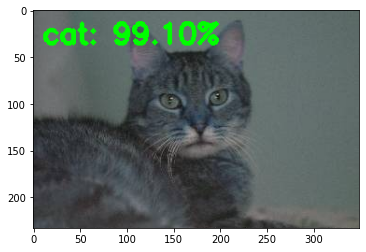

In [63]:
imageDataLabels = "{}: {:.2f}%".format(class_data[probabilityMaximum], predict[probabilityMaximum]*100)
cv2.putText(testImageData, imageDataLabels, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

plt.imshow(testImageData, cmap = "gray")
plt.show()